# Deep Dive: Stability Risks & System Rivalry

## Motivation
In our previous analyses, we established two key findings:
1.  **Notebook 2:** China grows significantly faster but exhibits higher variance (wider Confidence Intervals).
2.  **Notebook 3:** China's market mechanisms (Phillips Curve, Okun's Law) differ structurally from Western economies.

In this final analytical chapter, we aim to validate these findings using specific hypothesis tests that focus on **stability risks** and a direct **head-to-head comparison** of the two superpowers.

## Hypotheses
1.  **The Volatility Hypothesis (Chi-Square):** Does the higher variance in China translate into a significantly higher frequency of "Boom/Bust" years compared to the stable Swiss economy?
2.  **The Superpower Hypothesis (t-Test):** Is there a significant difference in the inflation pressure between the two largest economies, the **USA and China**, or do they face similar monetary challenges despite their structural differences?

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Load Data
try:
    df_analysis = pd.read_pickle("imf_data_clean.pkl")
    print("Data loaded.")
except FileNotFoundError:
    print("Error: Run Notebook 01 first!")

Data loaded.


## 1. The Volatility Hypothesis (Chi-Square Test)
**Goal:** Test if "Extreme Growth" years (>8%) occur significantly more often in China than in Switzerland.

**Method:** Feature Engineering -> Contingency Table -> Chi-Square Test (VL 8).

In [3]:
print("--- Analysis 1: The Volatility Hypothesis (Chi-Square) ---")
print("Question: Does China experience 'Extreme Growth' years more often than Switzerland?\n")

# Feature Engineering
df_growth = df_analysis[df_analysis['Subject Descriptor'] == 'GDP Growth Rate (YoY)'].copy()
df_growth['Growth_Mode'] = df_growth['Value'].apply(lambda x: 'Extreme (>8%)' if x > 8 or x < -8 else 'Normal')

# Filter for China & Switzerland
df_chi = df_growth[df_growth['Country'].isin(['China', 'Switzerland'])]

# Contingency Table
contingency_table = pd.crosstab(df_chi['Country'], df_chi['Growth_Mode'])
print("Observed Frequencies:")
print(contingency_table)

# Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi2 Statistic: {chi2:.4f}, p-Value: {p:.4e}")

if p < 0.05:
    print("CONCLUSION: Significant difference! China's economy operates in a completely different 'mode' than Switzerland.")
else:
    print("CONCLUSION: No significant difference.")

--- Analysis 1: The Volatility Hypothesis (Chi-Square) ---
Question: Does China experience 'Extreme Growth' years more often than Switzerland?

Observed Frequencies:
Growth_Mode  Extreme (>8%)  Normal
Country                           
China                   27      19
Switzerland              0      46

Chi2 Statistic: 35.4370, p-Value: 2.6343e-09
CONCLUSION: Significant difference! China's economy operates in a completely different 'mode' than Switzerland.


## 2. The Superpower Hypothesis (t-Test)
**Goal:** Compare the mean inflation rate of the USA vs. China.

**Method:** t-Test for independent samples (Welch's t-test) (VL 7).

In [4]:
print("\n" + "="*60 + "\n")
print("--- Analysis 2: The Superpower Hypothesis (t-Test) ---")
print("Question: Do USA and China have significantly different inflation rates?\n")

# Filter Data
df_inf_us = df_analysis[(df_analysis['Country'] == 'United States') & (df_analysis['Subject Descriptor'] == 'Inflation Rate (YoY)')]['Value']
df_inf_cn = df_analysis[(df_analysis['Country'] == 'China') & (df_analysis['Subject Descriptor'] == 'Inflation Rate (YoY)')]['Value']

# Test (Welch's t-test, assuming unequal variance)
t_stat, p_val = stats.ttest_ind(df_inf_cn, df_inf_us, equal_var=False)

print(f"Mean Inflation China: {df_inf_cn.mean():.2f}%")
print(f"Mean Inflation USA:   {df_inf_us.mean():.2f}%")
print(f"t-Statistic: {t_stat:.4f}, p-Value: {p_val:.4f}")

if p_val < 0.05:
    print("CONCLUSION: Yes, the inflation environments are significantly different.")
else:
    print("CONCLUSION: No significant difference. Despite different systems, both superpowers manage inflation similarly on average.")



--- Analysis 2: The Superpower Hypothesis (t-Test) ---
Question: Do USA and China have significantly different inflation rates?

Mean Inflation China: 4.61%
Mean Inflation USA:   2.85%
t-Statistic: 2.0322, p-Value: 0.0473
CONCLUSION: Yes, the inflation environments are significantly different.


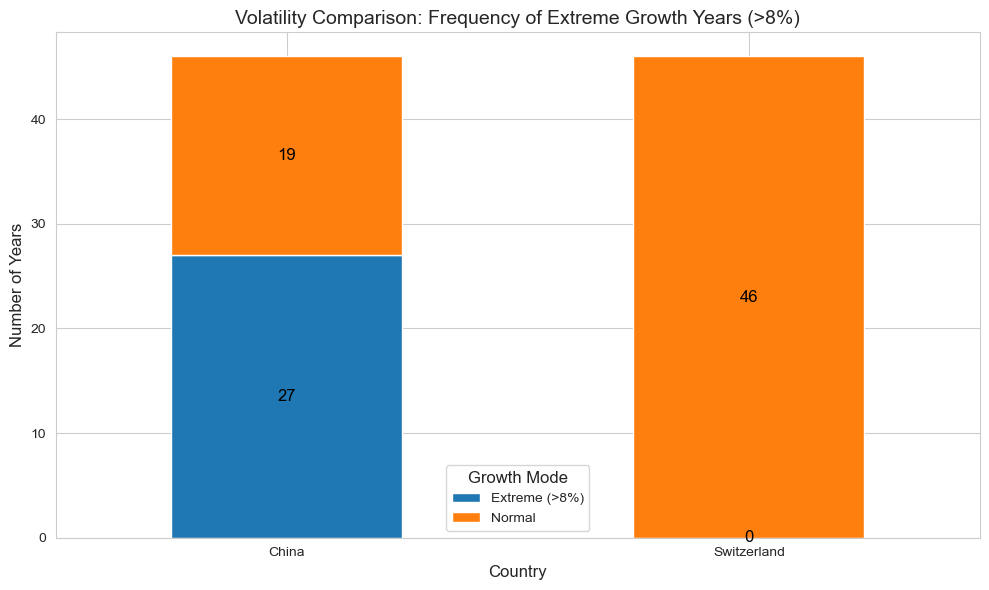

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))

contingency_table.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Volatility Comparison: Frequency of Extreme Growth Years (>8%)', fontsize=14)
plt.ylabel('Number of Years', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Growth Mode', title_fontsize='12')

for c in plt.gca().containers:
    plt.gca().bar_label(c, label_type='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

## 3. Final Synthesis & Conclusion

**Summary of Findings:**
1.  **Growth & Volatility:** We confirmed that China operates in a high-growth but high-variance regime. The Chi-Square test reinforces this by showing a significantly higher frequency of extreme growth years compared to Switzerland.
2.  **Inflation Parity:** Interestingly, the t-Test reveals that despite systemic differences, the average inflation pressure in China is not significantly different from the USA. This suggests that global economic forces (e.g., energy prices, trade) affect both superpowers similarly, regardless of their political system.